# Neuroscape playground

In [24]:
# imports
from multiprocessing import Pool
import jax
from jax import random, grad, jit, vmap, lax
import jax.numpy as jnp
import src
import importlib
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from nilearn import datasets, plotting, maskers
# black background

In [2]:
importlib.reload(src);
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['letter.spacing'] = '0.3em'

## neuroinformatics

In [80]:
DATA_DIR = src.utils.DATA_DIR
subeject = 'subj05'
lh_file = os.path.join(DATA_DIR, subeject, 'training_split/training_fmri/lh_training_fmri.npy')
rh_file = os.path.join(DATA_DIR, subeject, 'training_split/training_fmri/rh_training_fmri.npy')
roi_dir = os.path.join(DATA_DIR, subeject, 'roi_masks')
fs_average_roi = lambda h: os.path.join(roi_dir, f'{h}h.all-vertices_fsaverage_space.npy')
places_roi = lambda h: os.path.join(roi_dir, f'{h}h.floc-places_challenge_space.npy')

In [81]:
lh, rh = np.load(lh_file), np.load(rh_file)
l_places, r_places = np.load(places_roi('l')), np.load(places_roi('r'))

In [82]:
np.sum(l_places)

6447

In [68]:
# Generate example data
n = 100 # number of timepoints
m = 2000 # number of voxels
X = np.random.randn(n, m) # simulate fMRI data

# Compute correlation matrix
corr_matrix = np.corrcoef(rh.T)
corr_matrix.shape

(20544, 20544)

In [69]:
# save numpy array
np.save(os.path.join(DATA_DIR, 'rh_corr_mat.npy'), corr_matrix)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

## machine learning

In [9]:
n_steps = 100
batch_size = 32
n_samples = 100

In [4]:

args_list = [
    '--machine', 'local',
    '--subject', 'subj05',
    '--batch_size', str(batch_size),
    '--n', str(n_samples),
    '--n_steps', str(n_steps),
    ]

In [5]:
reload_data = True  # flip to false after first run
config, args = src.get_setup(args_list)
if reload_data:
    train_loader, val_loader, _ = src.get_loaders(args, config)
    next(train_loader), next(val_loader);

100%|██████████| 100/100 [00:02<00:00, 36.21it/s]


In [10]:
steps = 10
for i in range(steps):
    img, cat, sup, cap, lh, rh = next(train_loader)
    print(lh.shape)
    break


(16, 19004)


In [8]:
rng = jax.random.PRNGKey(0)
params = src.init_params(config, rng)
metrics = {'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': [] }

train loss: 0.1222, train acc: 0.9656, val loss: 0.1231, val acc: 0.9703: 100%|██████████| 100/100 [00:05<00:00, 17.28it/s]


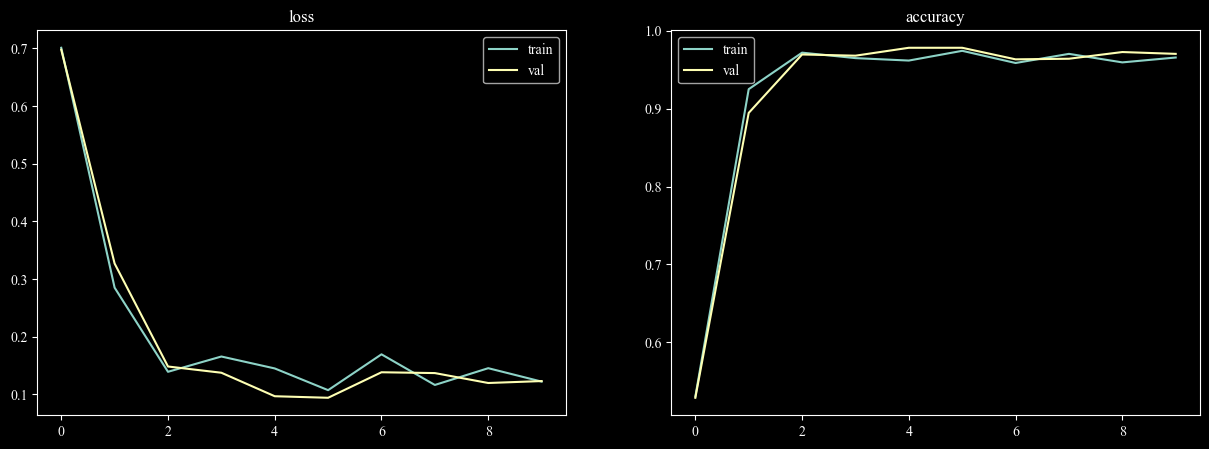

In [9]:

params, metrics = src.train(params, metrics, config, args, train_loader, val_loader)
src.plot_metrics(metrics);

In [10]:
param_sizes = [p.size for p in jax.tree_util.tree_flatten(params)[0]]
num_params = sum(param_sizes)
print(f'Number of parameters: {num_params}')

Number of parameters: 63892
